# Python Essentials for Machine Learning: Heart Disease Detection

## Introduction
The primary goal of this project is to utilize machine learning techniques to detect the presence of heart disease based on various health indicators. The dataset contains 1,000 records, each with features such as Age, Gender, Cholesterol levels, Blood Pressure, Heart Rate, Smoking habits, Alcohol Intake, Exercise Hours, Family History, Diabetes, Obesity, Stress Level, Blood Sugar, Exercise Induced Angina, Chest Pain Type, and Heart Disease.

This project will involve several key steps:
1. Data Cleaning: Ensuring the data is clean and ready for analysis.
2. Exploratory Data Analysis (EDA): Understanding the relationships between different features.
3. Data Visualization: Using visual tools to highlight important trends and p dataset.

Through this project, we aim to identify key factors that contribute to heart disease, which could aid in early detection and prevention strategies.


# Import Libraries

In [839]:
# Data manipulation and analysis
import pandas as pd  # For data manipulation and analysis using DataFrames

# Plotting and visualization
import matplotlib.pyplot as plt  # For creating static, animated, and interactive visualizations
import seaborn as sns  # For making statistical graphics and enhancing matplotlib visualizations

# Numerical operations
import numpy as np  # For numerical operations and handling arrays

# Machine learning models
from sklearn.linear_model import LogisticRegression  # Logistic Regression model for binary classification
from sklearn.tree import DecisionTreeClassifier  # Decision Tree model for classification
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier  # Ensemble methods for improved classification performance
from sklearn.svm import SVC  # Support Vector Classification model
from sklearn.neighbors import KNeighborsClassifier  # k-Nearest Neighbors model for classification
from sklearn.naive_bayes import GaussianNB  # Naive Bayes model for classification

# Model evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score  # Metrics for evaluating model performance

# Data preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder  # Scalers for feature scaling and encoder for categorical labels
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets

# Dimensionality reduction
from sklearn.decomposition import PCA  # Principal Component Analysis for reducing dimensionality

# Feature selection
from sklearn.feature_selection import SelectKBest, f_classif  # For feature selection based on statistical tests

# Warning suppression
import warnings  # To manage and suppress warnings during execution

warnings.filterwarnings('ignore')

In [840]:
# Load the dataset
data = pd.read_csv('heart_disease_dataset.csv')

### Dataset Information
To get a summary of the dataset including the data types and non-null counts, use the info() method. This helps in understanding the structure of the dataset and identifying any potential issues with missing values.

In [842]:
data.shape

(1000, 16)

In [843]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1000 non-null   int64 
 1   Gender                   1000 non-null   object
 2   Cholesterol              1000 non-null   int64 
 3   Blood Pressure           1000 non-null   int64 
 4   Heart Rate               1000 non-null   int64 
 5   Smoking                  1000 non-null   object
 6   Alcohol Intake           660 non-null    object
 7   Exercise Hours           1000 non-null   int64 
 8   Family History           1000 non-null   object
 9   Diabetes                 1000 non-null   object
 10  Obesity                  1000 non-null   object
 11  Stress Level             1000 non-null   int64 
 12  Blood Sugar              1000 non-null   int64 
 13  Exercise Induced Angina  1000 non-null   object
 14  Chest Pain Type          1000 non-null   

# Step 1: Data Cleaning and Preparation

In this step, we focus on cleaning and preparing the dataset for analysis. This involves handling missing values, checking for redundant or unnecessary columns, and ensuring the data is structured appropriately.

In [845]:
# Display the first few rows to ensure it's loaded corectly
data.head()

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease
0,75,Female,228,119,66,Current,Heavy,1,No,No,Yes,8,119,Yes,Atypical Angina,1
1,48,Male,204,165,62,Current,NaN,5,No,No,No,9,70,Yes,Typical Angina,0
2,53,Male,234,91,67,Never,Heavy,3,Yes,No,Yes,5,196,Yes,Atypical Angina,1
3,69,Female,192,90,72,Current,NaN,4,No,Yes,No,7,107,Yes,Non-anginal Pain,0
4,62,Female,172,163,93,Never,NaN,6,No,Yes,No,2,183,Yes,Asymptomatic,0


###  Check for Missing Values

To identify which columns contain missing values and how many missing entries each column has, we will use the `isnull().sum()` method. This will help us determine which columns need attention for data cleaning.

In [847]:
# Check for missing values in each column
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

Alcohol Intake    340
dtype: int64


###  Fill Missing Values in 'Alcohol Intake'

To handle missing values in the `Alcohol Intake` column, we will fill these missing values with a placeholder value ('None'). This ensures that we have no NaN values in this column and can proceed with data analysis and modeling.

In [849]:
# Fill missing values in 'Alcohol Intake' with 'None'
data['Alcohol Intake'] = data['Alcohol Intake'].fillna('None')

###  Check for Missing Values After Imputation

To verify that all missing values have been successfully handled, we will check the dataset again for any remaining missing values after the imputation process. This ensures that our data cleaning steps were effective.

In [851]:
# Check for missing values after imputation
missing_values_after = data.isnull().sum()
print('Missing values after imputation:\n', missing_values_after)

Missing values after imputation:
 Age                        0
Gender                     0
Cholesterol                0
Blood Pressure             0
Heart Rate                 0
Smoking                    0
Alcohol Intake             0
Exercise Hours             0
Family History             0
Diabetes                   0
Obesity                    0
Stress Level               0
Blood Sugar                0
Exercise Induced Angina    0
Chest Pain Type            0
Heart Disease              0
dtype: int64


### Checking for Constant Columns
We examine the dataset to ensure there are no constant columns, which are columns with the same value across all rows and therefore offer no useful information for analysis.

In [853]:
# Check for constant columns
constant_columns = [col for col in data.columns if data[col].nunique() == 1]
print('Constant columns:', constant_columns)

Constant columns: []


###  Define and Apply a Severity Calculation Function
To assess the severity of heart disease, we will define a function that calculates a severity score based on certain features such as Cholesterol, Blood Pressure, and Heart Rate. This function will be applied to each row of the dataset to create a new `Severity` column. The severity scores will be rounded to three decimal places for precision.


In [855]:
# Define a function to calculate disease severity
def calculate_severity(row):
    # This is an example formula; adjust as necessary for your analysis
    severity = (row['Cholesterol'] / 200) + (row['Blood Pressure'] / 120) + (row['Heart Rate'] / 70) + (row['Blood Sugar'] / 140)
    # Cholesterol: Assumed baseline value of 200. Higher values increase severity.
    # Blood Pressure: Assumed baseline value of 120. Higher values increase severity.
    # Heart Rate: Assumed baseline value of 70. Higher values increase severity.
    # Blood Sugar: Assumed baseline value of 140. Higher values increase severity.

    return severity

# Apply this function to create the 'Severity' column
data['Severity'] = data.apply(calculate_severity, axis=1)
# Round 'Severity' column to 3 decimal places
data['Severity'] = data['Severity'].round(3)

# Display the first few rows to verify the new 'Severity' column
data.head()

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease,Severity
0,75,Female,228,119,66,Current,Heavy,1,No,No,Yes,8,119,Yes,Atypical Angina,1,3.925
1,48,Male,204,165,62,Current,None,5,No,No,No,9,70,Yes,Typical Angina,0,3.781
2,53,Male,234,91,67,Never,Heavy,3,Yes,No,Yes,5,196,Yes,Atypical Angina,1,4.285
3,69,Female,192,90,72,Current,None,4,No,Yes,No,7,107,Yes,Non-anginal Pain,0,3.503
4,62,Female,172,163,93,Never,None,6,No,Yes,No,2,183,Yes,Asymptomatic,0,4.854


### Sort by Severity Level
To organize the dataset based on the seriousness of the heart disease, we will sort the dataset by the `Severity` column in ascending order. This will ensure that rows with the lowest severity are listed first, moving to the highest severity.


In [857]:
# Sort the DataFrame by the 'Severity' column in ascending order
data = data.sort_values(by='Severity')

# Display the last few rows to verify the sorting
data.tail()

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease,Severity
535,38,Female,340,176,98,Current,Heavy,5,No,No,No,1,155,Yes,Non-anginal Pain,0,5.674
843,31,Female,333,168,93,Current,Moderate,4,No,No,No,6,184,No,Asymptomatic,0,5.708
608,27,Male,328,172,97,Never,None,1,No,No,No,1,179,No,Asymptomatic,0,5.738
786,66,Female,321,168,95,Former,Heavy,2,No,Yes,Yes,4,199,Yes,Atypical Angina,1,5.784
810,58,Female,342,175,89,Former,None,4,No,Yes,No,1,194,Yes,Typical Angina,1,5.825


### Add Custom Index
Add a new index to the dataset, labeled from Person0 to Person999.

In [859]:
# Create a new column with the index labels from 'Person0' to 'Person999'
data['Person'] = ['Person' + str(i+1) for i in range(len(data))] 

# Set this new 'Person' column as the index
data = data.set_index('Person')
#Removing the column name of the index
data.index.name = None
# Display the DataFrame with the new index
data.head()

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease,Severity
Person1,65,Male,151,107,64,Former,Moderate,4,Yes,Yes,Yes,10,70,No,Typical Angina,0,3.061
Person2,35,Male,176,90,69,Former,Heavy,9,Yes,Yes,No,7,81,Yes,Typical Angina,0,3.194
Person3,76,Male,156,91,80,Former,None,0,No,Yes,No,7,74,Yes,Non-anginal Pain,0,3.210
Person4,48,Female,171,103,69,Never,None,4,No,No,Yes,8,72,Yes,Atypical Angina,0,3.213
Person5,79,Male,158,110,73,Never,Moderate,3,No,No,No,3,71,No,Atypical Angina,0,3.257


### Arranging the columns

In [861]:
data = data[['Age', 'Gender', 'Cholesterol', 'Blood Pressure','Smoking','Alcohol Intake', 'Exercise Hours',
             'Family History','Diabetes', 'Obesity' , 'Stress Level' ,'Blood Sugar' , 'Exercise Induced Angina',
             'Chest Pain Type','Heart Rate', 'Severity', 'Heart Disease']]
data.head()

,Age,Gender,Cholesterol,Blood Pressure,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Rate,Severity,Heart Disease
Person1,65,Male,151,107,Former,Moderate,4,Yes,Yes,Yes,10,70,No,Typical Angina,64,3.061,0
Person2,35,Male,176,90,Former,Heavy,9,Yes,Yes,No,7,81,Yes,Typical Angina,69,3.194,0
Person3,76,Male,156,91,Former,None,0,No,Yes,No,7,74,Yes,Non-anginal Pain,80,3.210,0
Person4,48,Female,171,103,Never,None,4,No,No,Yes,8,72,Yes,Atypical Angina,69,3.213,0
Person5,79,Male,158,110,Never,Moderate,3,No,No,No,3,71,No,Atypical Angina,73,3.257,0


### Remove Exact Duplicates
To ensure the dataset contains unique rows, we will remove any duplicate entries.

In [863]:
# Remove exact duplicate rows
data = data.drop_duplicates()

### Detect and Remove Outliers
Objective: Identify and handle outliers to improve data quality.

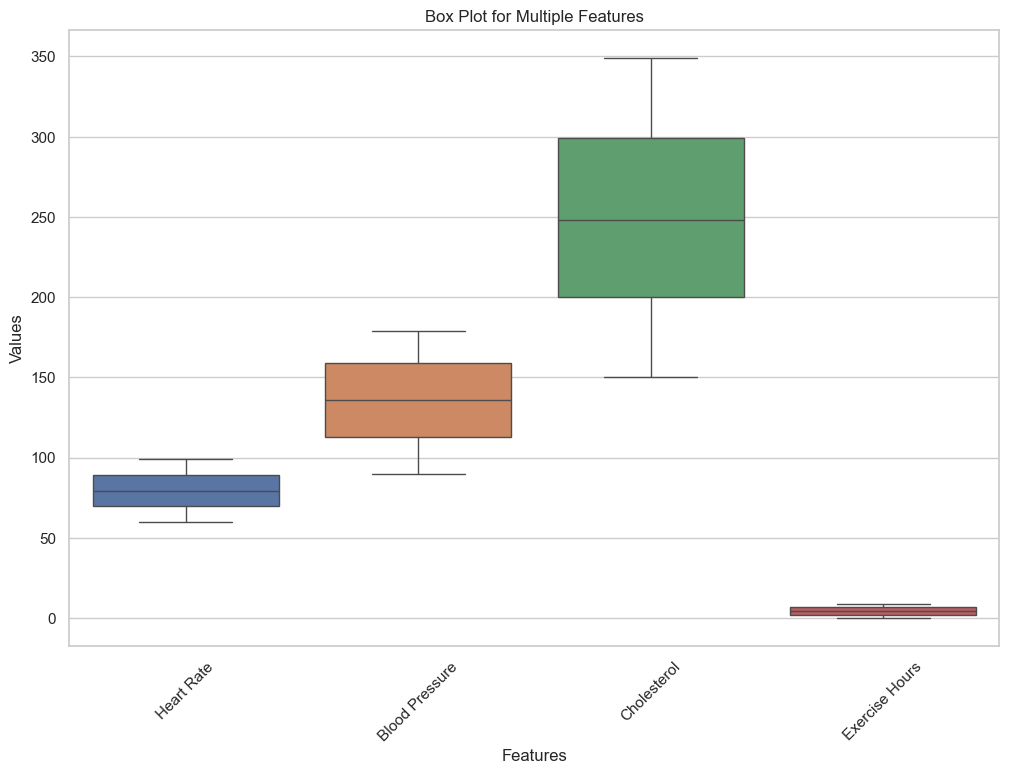

In [865]:
# Define the numerical columns you want to include in the box plot
numerical_columns = ['Heart Rate', 'Blood Pressure', 'Cholesterol', 'Exercise Hours']

# Create a box plot for multiple features
plt.figure(figsize=(12, 8))
sns.boxplot(data=data[numerical_columns])

# Customize the plot
plt.title('Box Plot for Multiple Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()

In [866]:
#There are no ouliers so we dont have to remove anything

### Scaling and Normalization
Normalization (also known as Min-Max scaling) rescales data to a fixed range, usually 0 to 1.

- Helps to ensure that all features contribute equally to the model.
- Particularly useful when features have different units or ranges.

In [868]:
# Standardize numerical columns
# Define the numerical columns to be scaled
numerical_columns = ['Cholesterol', 'Blood Pressure', 'Heart Rate', 'Exercise Hours', 'Blood Sugar']

# Initialize StandardScaler
scaler = StandardScaler()
# Apply standardization
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Initialize MinMaxScaler
normalizer = MinMaxScaler()
# Apply normalization
data[numerical_columns] = normalizer.fit_transform(data[numerical_columns])

In [869]:
# Check the scaled values
print("Scaled data preview:")
print(data[['Cholesterol', 'Blood Pressure', 'Heart Rate', 'Exercise Hours', 'Blood Sugar']].head())

Scaled data preview:
         Cholesterol  Blood Pressure  Heart Rate  Exercise Hours  Blood Sugar
Person1     0.005025        0.191011    0.102564        0.444444     0.000000
Person2     0.130653        0.000000    0.230769        1.000000     0.085271
Person3     0.030151        0.011236    0.512821        0.000000     0.031008
Person4     0.105528        0.146067    0.230769        0.444444     0.015504
Person5     0.040201        0.224719    0.333333        0.333333     0.007752


# Step 2: Exploratory Data Analysis (EDA)

In this step, we will explore the dataset to understand its characteristics and relationships between different variables. This will help us identify patterns, trends, and insights that can guide further analysis and visualization.

### Checking for Unique Values
Check for unique values in categorical columns to understand their distribution and ensure proper handling in the analysis.

In [872]:
# Check unique values in categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns # object = string
for col in categorical_columns:
    print(f'Unique values in {col}:', data[col].unique())

Unique values in Gender: ['Male' 'Female']
Unique values in Smoking: ['Former' 'Never' 'Current']
Unique values in Alcohol Intake: ['Moderate' 'Heavy' 'None']
Unique values in Family History: ['Yes' 'No']
Unique values in Diabetes: ['Yes' 'No']
Unique values in Obesity: ['Yes' 'No']
Unique values in Exercise Induced Angina: ['No' 'Yes']
Unique values in Chest Pain Type: ['Typical Angina' 'Non-anginal Pain' 'Atypical Angina' 'Asymptomatic']


### Statistical Summary
To obtain a statistical summary of the numerical columns, use the describe() method. This provides insights into the central tendency, spread, and shape of the distribution of the numerical features.

In [874]:
data.describe().T # T refers to transpose

,count,mean,std,min,25%,50%,75%,max
Age,1000.0,52.293000,15.727126,25.000,39.000000,52.000000,66.000000,79.000
Cholesterol,1000.0,0.502206,0.291029,0.000,0.251256,0.492462,0.748744,1.000
Blood Pressure,1000.0,0.508775,0.296498,0.000,0.255618,0.516854,0.775281,1.000
Exercise Hours,1000.0,0.503222,0.326027,0.000,0.222222,0.500000,0.777778,1.000
Stress Level,1000.0,5.646000,2.831024,1.000,3.000000,6.000000,8.000000,10.000
Blood Sugar,1000.0,0.503419,0.284493,0.000,0.263566,0.503876,0.751938,1.000
Heart Rate,1000.0,0.492410,0.294515,0.000,0.256410,0.487179,0.743590,1.000
Severity,1000.0,4.472403,0.474130,3.061,4.148750,4.474500,4.814750,5.825
Heart Disease,1000.0,0.392000,0.488441,0.000,0.000000,0.000000,1.000000,1.000


### Encoding Categorical Data

Convert categorical features to numerical values using techniques like Label Encoding or One-Hot Encoding. This is necessary for performing numerical operations and visualizations.

In [876]:
# Initialize the label encoder
label_encoder = LabelEncoder()

# Encode categorical columns in the temporary DataFrame
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Smoking'] = label_encoder.fit_transform(data['Smoking'])
data['Alcohol Intake'] = label_encoder.fit_transform(data['Alcohol Intake'])
data['Family History'] = label_encoder.fit_transform(data['Family History'])
data['Diabetes'] = label_encoder.fit_transform(data['Diabetes'])
data['Obesity'] = label_encoder.fit_transform(data['Obesity'])
data['Exercise Induced Angina'] = label_encoder.fit_transform(data['Exercise Induced Angina'])
data['Chest Pain Type'] = label_encoder.fit_transform(data['Chest Pain Type'])

In [877]:
#after encoding all the columns became numerical values
data.dtypes

Age                          int64
Gender                       int32
Cholesterol                float64
Blood Pressure             float64
Smoking                      int32
Alcohol Intake               int32
Exercise Hours             float64
Family History               int32
Diabetes                     int32
Obesity                      int32
Stress Level                 int64
Blood Sugar                float64
Exercise Induced Angina      int32
Chest Pain Type              int32
Heart Rate                 float64
Severity                   float64
Heart Disease                int64
dtype: object

### Correlation Analysis

Correlation analysis helps to identify the strength and direction of relationships between numerical features. We'll calculate the correlation matrix and visualize it using a heatmap.

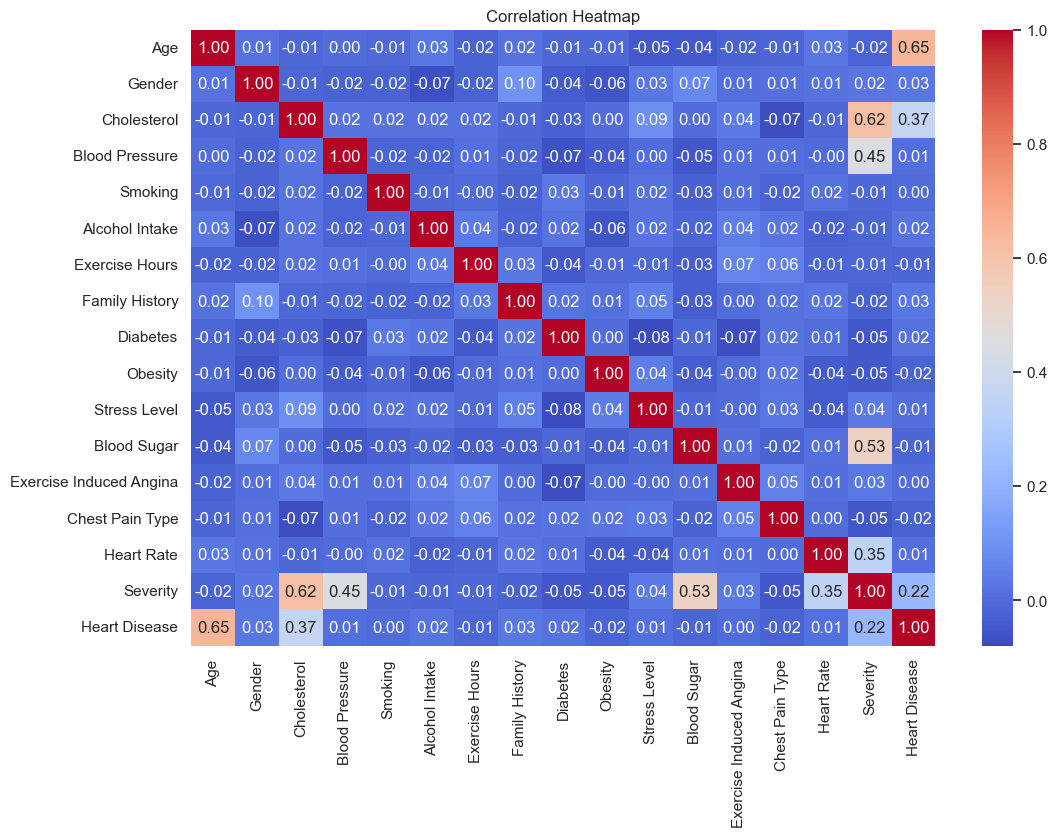

In [879]:
# Compute the correlation matrix
correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Step 3: Some Important Visualizations

In this section, we will create visualizations to gain insights into the dataset. Each type of plot will be used to highlight different aspects of the data.

### 1. Line Plot
- Purpose: To show trends over time or ordered data.
- Variable: Example, age_vs_blood_pressure (plotting Age vs. Blood Pressure).

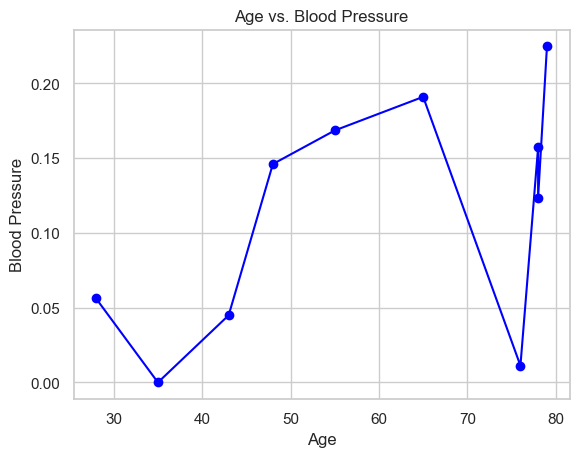

In [882]:
# Select a subset of rows (e.g., first 10 rows for simplicity)

# Sample data (replace with your actual data)
age = data['Age'].head(10)
blood_pressure = data['Blood Pressure'].head(10)

# Sort the data based on age
sorted_indices = np.argsort(age)
age = np.array(age)[sorted_indices]
blood_pressure = np.array(blood_pressure)[sorted_indices]

# Create the line plot
plt.plot(age, blood_pressure, marker='o', linestyle='-', color='blue')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Blood Pressure')
plt.title('Age vs. Blood Pressure')

# Show the plot
plt.grid(True)
plt.show()

### 2. Area Plot
- Purpose: To show the cumulative total of data over time or a continuous variable.
- Variable: Example, exercise_hours_vs_age (plotting Age vs. Exercise Hours).

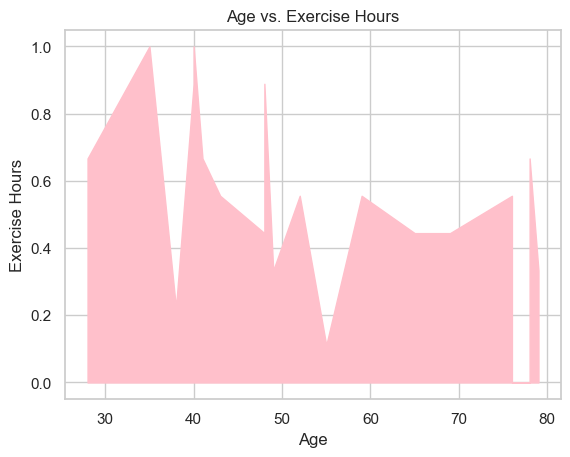

In [884]:
age = data['Age'].head(20)
exercise_hours = data['Exercise Hours'].head(20)

# Sort the data based on age
sorted_indices = np.argsort(age)
age = np.array(age)[sorted_indices]
exercise_hours = np.array(exercise_hours)[sorted_indices]

# Create the area plot
plt.fill_between(age, exercise_hours, color='pink')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Exercise Hours')
plt.title('Age vs. Exercise Hours')

plt.show()

### 3. Histogram
- Purpose: To show the distribution of a numerical variable.
- Variable: Example, cholesterol_distribution (distribution of Cholesterol).

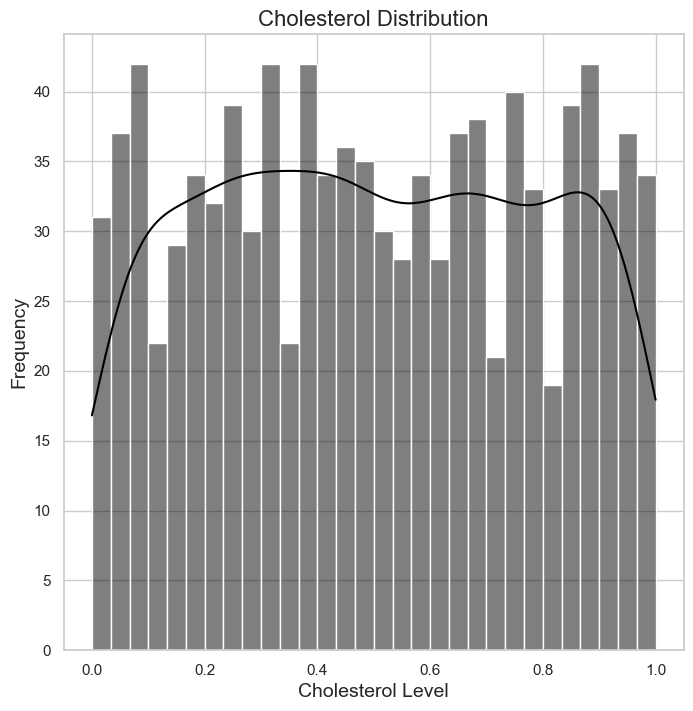

In [886]:
# Set the style of seaborn plot
sns.set(style="whitegrid")

# Plot a histogram for the 'Cholesterol' distribution
plt.figure(figsize=(8, 8))
sns.histplot(data['Cholesterol'], bins=30, kde=True, color='black')

# Add titles and labels
plt.title('Cholesterol Distribution', fontsize=16)
plt.xlabel('Cholesterol Level', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot
plt.show()

### 4. Bar Chart
- Purpose: To compare different categories.
- Variable: Example, gender_distribution (counts of Gender).

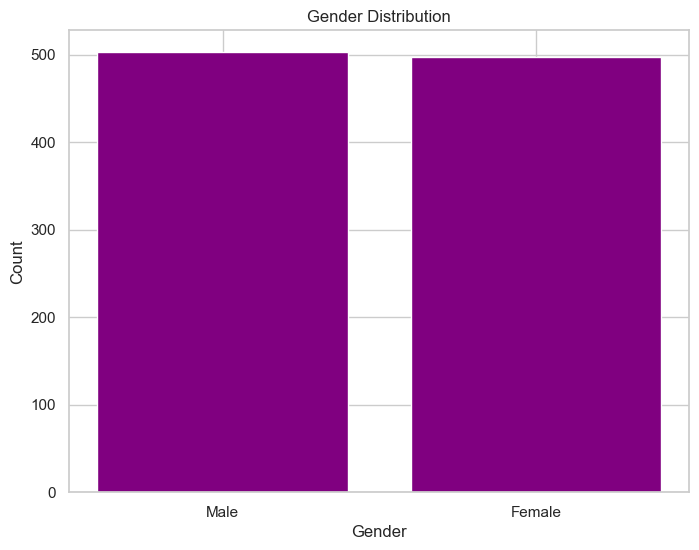

In [888]:
# Calculate the counts of each gender
gender_distribution = data['Gender'].value_counts()

# Plotting the bar chart using Matplotlib with purple color
plt.figure(figsize=(8, 6))
plt.bar(gender_distribution.index, gender_distribution.values, color='purple')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])  # Adjusting the labels for readability
plt.show()

### 5. Pie Chart
- Purpose: To show the proportion of categories within a whole.
- Variable: Example, heart_disease_pie (proportion of Heart Disease).

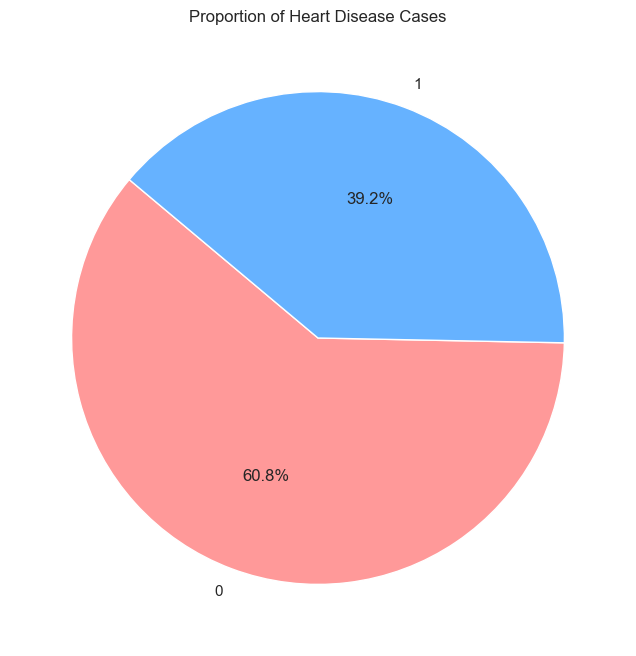

In [890]:
# Define the variable for a pie chart
# Count the number of cases with and without heart disease
heart_disease_pie = data['Heart Disease'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(heart_disease_pie, labels=heart_disease_pie.index, autopct='%1.1f%%', colors=['#FF9999','#66B2FF'], startangle=140)
plt.title('Proportion of Heart Disease Cases')
plt.show()

### 6. Scatter Plot
- Purpose: To show the relationship between two numerical variables.
- Variable: Example, age_vs_heart_rate (plotting Age vs. Heart Rate).

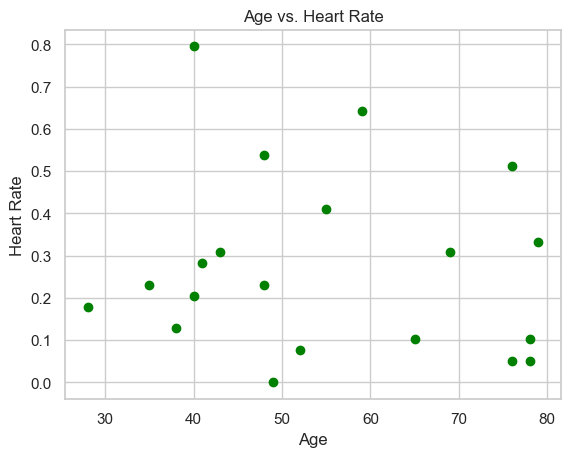

In [892]:
# Define the variable for a scatter plot
# Sample data (replace with your actual data)
age = data['Age'].head(20)
heart_rate = data['Heart Rate'].head(20)

# Sort data based on age (optional)
sorted_indices = np.argsort(age)
age = np.array(age)[sorted_indices]
heart_rate = np.array(heart_rate)[sorted_indices]

# Create the scatter plot
plt.scatter(age, heart_rate, color='green', marker='o')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Heart Rate')
plt.title('Age vs. Heart Rate')

plt.show()

### 7. Bubble Plot
- Purpose: To show the relationship between three numerical variables.
- Variable: Example, age_blood_pressure_heart_rate (plotting Age vs. Blood Pressure with Heart Rate as the bubble size).

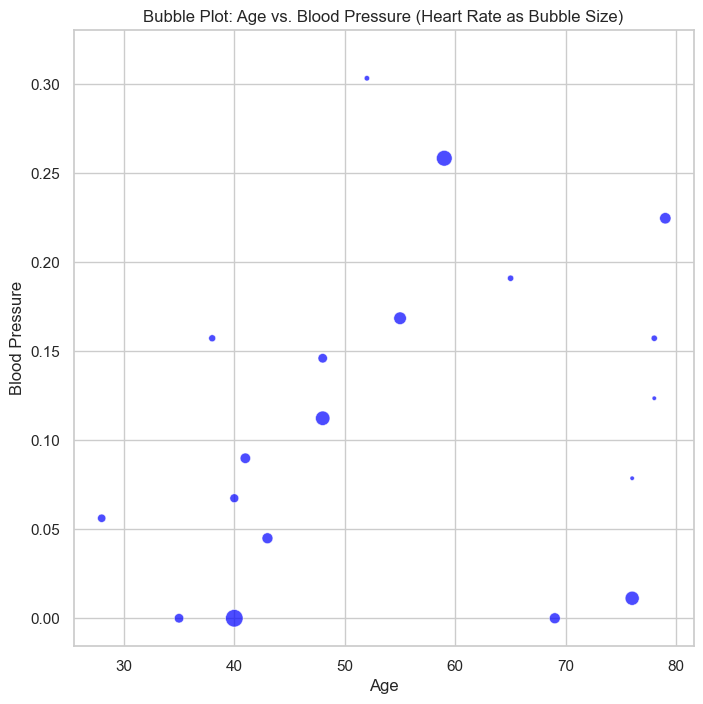

In [894]:
# Define variables for the bubble plot
age = data['Age'].head(20)
blood_pressure = data['Blood Pressure'].head(20)
heart_rate = data['Heart Rate'].head(20)

# Create a bubble plot with enhanced visibility
plt.figure(figsize=(8, 8))

# Ensure bubbles are large enough
bubble_size = (heart_rate - heart_rate.min()) * 200  # Scaling factor for visibility

# Create scatter plot
plt.scatter(age, blood_pressure, s=bubble_size, alpha=0.7, c='blue', edgecolors='w', linewidth=0.5)

# Adding titles and labels
plt.title('Bubble Plot: Age vs. Blood Pressure (Heart Rate as Bubble Size)')
plt.xlabel('Age')
plt.ylabel('Blood Pressure')

# Show grid
plt.grid(True)

# Display the plot
plt.show()

# Model Selection and Evaluation


##  Step 1: Define Inputs and Output*
In this step, we define the input features `X` and the output variable `y` from our dataset. The input features are all columns except for the `Heart Disease` column, which we aim to predict.

In [897]:
# Define inputs and output
X = data.drop('Heart Disease', axis=1)
y = data['Heart Disease']

## Step 2: Feature Engineering

### Feature Selection and Dimensionality Reduction

#### Feature Selection using SelectKBest
- **What it does**: Chooses the top features that are most useful for making predictions.
- **How it works**: Uses a method called ANOVA F-value (specified by `f_classif`) to rank features by how well they help separate the different categories in your d
### Principal Component Analysis (PCA)

- **What it does**: Reduces the number of features in your dataset while keeping the most important information.

- **How it works**:
  1. **Find Patterns**: PCA looks for patterns in your data and identifies the main directions (principal components) in which the data varies the most.
  2. **Transform Data**: It then transforms your original features into a new set of features (principal components) that are combinations of the original features. These new features capture the most important variations in the data.
  3. **Reduce Dimensions**: By keeping only the most important principal components, PCA reduces the number of features, making your data easier to work with and often improving the performance of machine learning models.ur data


In [900]:
# Feature Selection using SelectKBest
selector = SelectKBest(score_func=f_classif, k=5)  # Select top 5 features
X_selected = selector.fit_transform(X, y)

# Apply PCA (Dimensionality Reduction)
pca = PCA(n_components=3)  # Adjust the number of components as needed
X_pca = pca.fit_transform(X_selected)
#This combination of feature selection and PCA helps in creating a more manageable dataset for modeling
#Often leading to better model performance and interpretability.

## Step 3: Prepare Data for Modeling

In [902]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.25, random_state=42)

## Step 4: Initialize models

### Models

#### Logistic Regression
- **What it does**: Decides if something is true or false (like if a person has a disease or not).

#### Decision Tree
- **What it does**: Makes choices by asking simple yes/no questions, like a flowchart.

#### Random Forest
- **What it does**: Uses many decision trees together to make better decisions.

#### Gradient Boosting
- **What it does**: Builds several decision trees one after another to fix mistakes and improve results.

#### SVC (Support Vector Classification)
- **What it does**: Draws a line to separate different groups of data.

#### K-Nearest Neighbors (KNN)
- **What it does**: Looks at nearby examples to figure out what something is.

#### Naive Bayes
- **What it does**: Uses basic math to guess which category omething belongs to.
omething belongs to.
ven the class label.


In [905]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVC': SVC(probability=True),  # Ensure SVC has probability=True for ROC AUC
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

## Step 5: Function to evaluate models

### Model Evaluation Metrics

#### Accuracy
- **Function**: Measures how many predictions were correct out of all predictions made.
- **Rule**: `(Number of Correct Predictions) / (Total Number of Predictions)`

#### Precision
- **Function**: Indicates how many of the predicted positive cases were actually positive.
- **Rule**: `True Positives / (True Positives + False Positives)`

#### Recall
- **Function**: Shows how many of the actual positive cases were correctly identified by the model.
- **Rule**: `True Positives / (True Positives + False Negatives)`

#### F1 Score
- **Function**: Combines precision and recall into one metric to provide a balanced view.
- **Rule**: `2 * (Precision * Recall) / (Precision + Recall)`

#### ROC AUC
- **Function**: Evaluates the model's ability to distinguish between positive and negative cases across all thresholds.
- **Rule**: Area under the ROC curve, where the ROC curve plots the true positive rate against the false positive rate.
. threshold settings.
r values indicating better performance.


In [908]:
#Positive predictions in our data are 1 and negative are 0
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)#It will predict the values of the output from the test part of x
    return {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred), 
        'Recall': recall_score(y_test, y_pred), 
        'F1 Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    }

## Step 6: Initialize scalers


In [910]:
scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler()
}

## Step 7: Evaluate each model


In [912]:
# Evaluate each model with different scalers
for model_name, model in models.items():
    print(f"\n{model_name}:")
    
    for scaler_name, scaler in scalers.items():
        # Scale the data
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        # Evaluate model
        metrics = evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test)
        
        # Print metrics
        print(f"-------------\n{scaler_name}:\n-------------")
        for metric, value in metrics.items():
            print(f"{metric}: {value*100:.2f}%")


Logistic Regression:
-------------
StandardScaler:
-------------
Accuracy: 82.80%
Precision: 77.78%
Recall: 78.57%
F1 Score: 78.17%
ROC AUC: 92.96%
-------------
MinMaxScaler:
-------------
Accuracy: 82.00%
Precision: 76.77%
Recall: 77.55%
F1 Score: 77.16%
ROC AUC: 92.71%

Decision Tree:
-------------
StandardScaler:
-------------
Accuracy: 88.40%
Precision: 87.91%
Recall: 81.63%
F1 Score: 84.66%
ROC AUC: 87.20%
-------------
MinMaxScaler:
-------------
Accuracy: 88.80%
Precision: 87.23%
Recall: 83.67%
F1 Score: 85.42%
ROC AUC: 87.89%

Random Forest:
-------------
StandardScaler:
-------------
Accuracy: 92.80%
Precision: 92.55%
Recall: 88.78%
F1 Score: 90.62%
ROC AUC: 97.47%
-------------
MinMaxScaler:
-------------
Accuracy: 91.60%
Precision: 92.31%
Recall: 85.71%
F1 Score: 88.89%
ROC AUC: 97.69%

Gradient Boosting:
-------------
StandardScaler:
-------------
Accuracy: 90.80%
Precision: 90.32%
Recall: 85.71%
F1 Score: 87.96%
ROC AUC: 97.41%
-------------
MinMaxScaler:
-------------
A

## Step 8: Visualize the Accuarcy

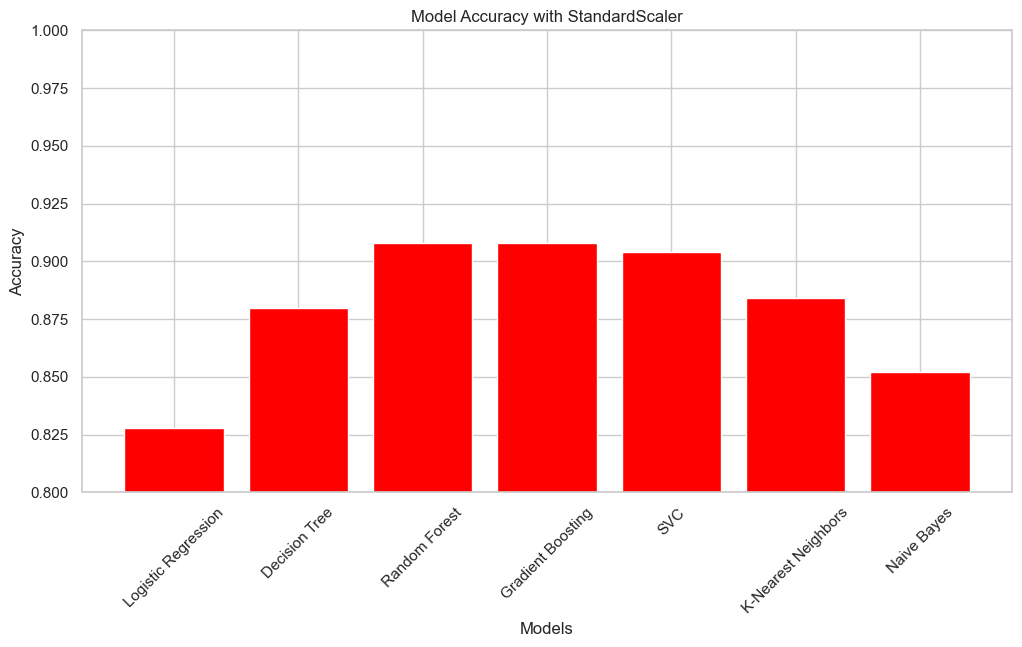

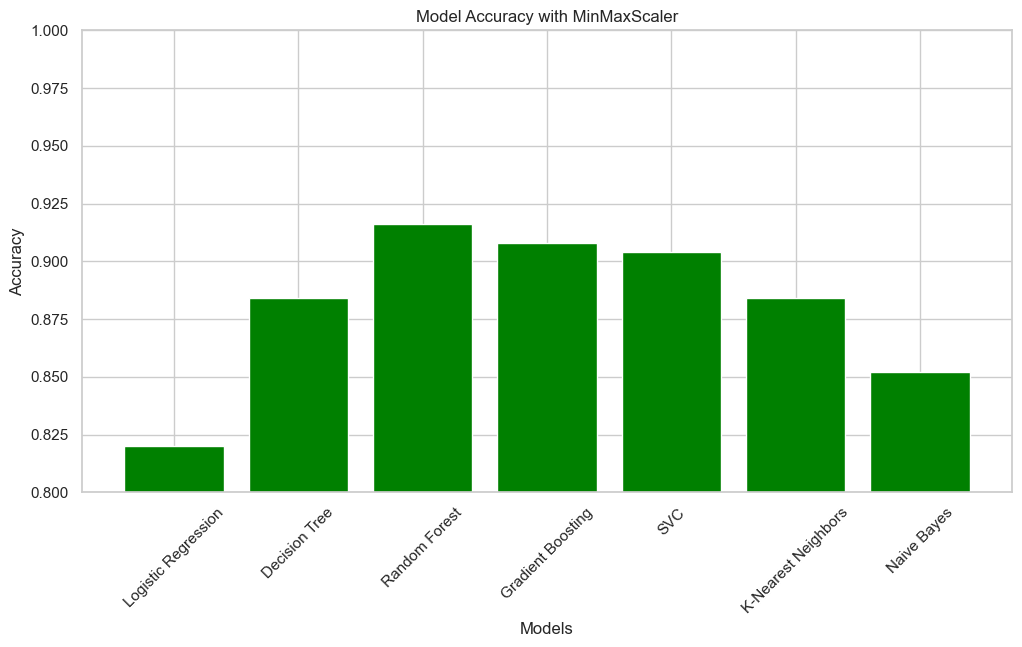

In [914]:
# Models
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'SVC', 'K-Nearest Neighbors', 'Naive Bayes']

# Accuracy data for StandardScaler
accuracy_standard = [0.828, 0.880, 0.908, 0.908, 0.904, 0.884, 0.852]

# Accuracy data for MinMaxScaler
accuracy_minmax = [0.820, 0.884, 0.916, 0.908, 0.904, 0.884, 0.852]

# Plotting the accuracy for StandardScaler
plt.figure(figsize=(12, 6))
plt.bar(models, accuracy_standard, color='red')
plt.title('Model Accuracy with StandardScaler')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1.0)  # Set the y-axis limits
plt.xticks(rotation=45)
plt.show()

# Plotting the accuracy for MinMaxScaler
plt.figure(figsize=(12, 6))
plt.bar(models, accuracy_minmax, color='green')
plt.title('Model Accuracy with MinMaxScaler')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1.0)  # Set the y-axis limits
plt.xticks(rotation=45)
plt.show()

## Conclusion

Based on the performance metrics, the **Random Forest** model achieved the highest accuracy and ROC AUC scores. Specifically:

- **Best Accuracy:** 92.00% (MinMaxScaler)
- **Best ROC AUC:** 97.54% (StandardScaler)

**Random Forest** is the best model for this dataset, showing superior performance in terms of accuracy and ability to distinguish between classes. This model is recommended for the final deployment or further analysis.